# Dataset Analysis

In [8]:
# useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("deep")

In [9]:
# === 1) Chargement du dataset nettoyé
DATA_PATH = Path.cwd().parents[0] / "cleaning" / "outputs" / "weld_quality_clean_from_hf.csv"
df = pd.read_csv(DATA_PATH)
print("[INFO] Shape:", df.shape)
df.head()
# === 2) Aperçu général
print("\n--- Aperçu général ---")
print(df.info())
print("\n--- Statistiques descriptives ---")
display(df.describe().T.round(3))

[INFO] Shape: (1652, 58)

--- Aperçu général ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 58 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / (weight%)                       1652 non-null   float64
 1   Silicon concentration / (weight%)                      1652 non-null   float64
 2   Manganese concentration / (weight%)                    1652 non-null   float64
 3   Sulphur concentration / (weight%)                      1652 non-null   float64
 4   Phosphorus concentration / (weight%)                   1652 non-null   float64
 5   Nickel concentration / (weight%)                       1652 non-null   float64
 6   Chromium concentration / (weight%)                     1652 non-null   float64
 7   Molybdenum concentration / (weight%)                   1652 non-null   float64
 8  

,count,mean,std,min,25%,50%,75%,max
Carbon concentration / (weight%),1652.0,0.076,0.024,0.029,0.062,0.074,0.086,0.180
Silicon concentration / (weight%),1652.0,0.329,0.112,0.040,0.270,0.320,0.360,1.140
Manganese concentration / (weight%),1652.0,1.203,0.382,0.270,0.940,1.270,1.440,2.250
Sulphur concentration / (weight%),1652.0,0.010,0.011,0.001,0.006,0.007,0.010,0.140
Phosphorus concentration / (weight%),1652.0,0.013,0.020,0.002,0.007,0.010,0.014,0.250
Nickel concentration / (weight%),1652.0,0.175,0.551,0.000,0.000,0.000,0.030,3.500
Chromium concentration / (weight%),1652.0,0.997,2.334,0.000,0.000,0.000,0.402,10.200
Molybdenum concentration / (weight%),1652.0,0.230,0.408,0.000,0.000,0.000,0.270,1.500
Vanadium concentration / (weight%),1652.0,0.027,0.069,0.000,0.000,0.000,0.010,0.320
Copper concentration / (weight%),1652.0,0.060,0.208,0.000,0.000,0.000,0.000,1.630



Top colonnes avec NaN:


Ferrite with carbide aggreagate / %                     0.946126
Martensite / %                                          0.946126
Acicular ferrite / %                                    0.945521
Ferrite with second phase / %                           0.945521
Primary ferrite in microstructure / %                   0.941889
Elongation / %                                          0.576271
Reduction of Area / %                                   0.573245
Ultimate tensile strength / MPa                         0.553269
Yield strength / MPa                                    0.527845
Charpy impact toughness / J                             0.467918
Charpy temperature / °C                                 0.467918
Nitrogen concentration / parts per million by weight    0.283898
Nitrogen concentration / (wt%)                          0.283898
Oxygen concentration / parts per million by weight      0.239709
Voltage / V                                             0.150121
dtype: float64

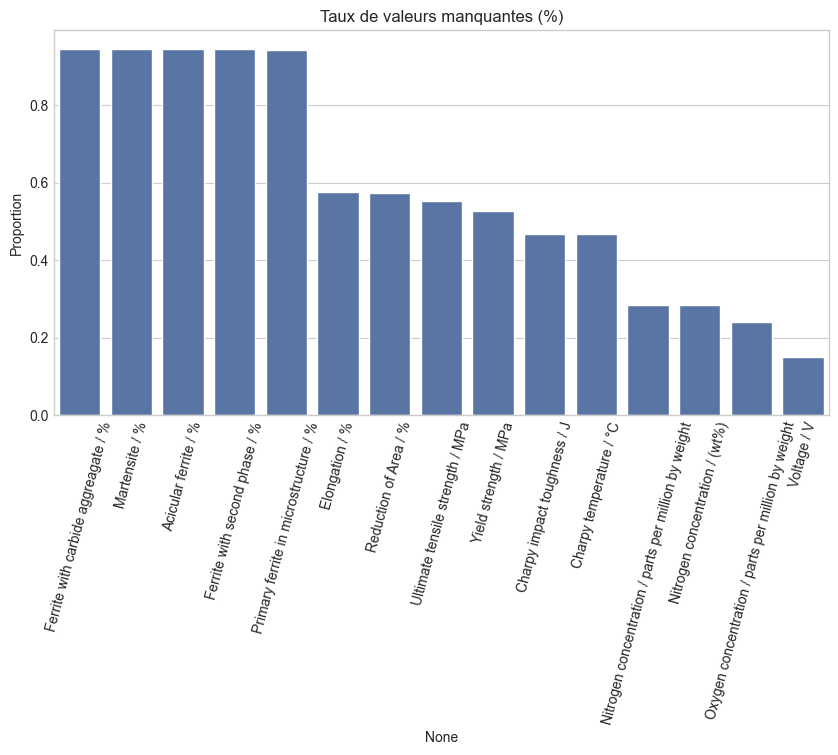

In [10]:
# === 3) Vérification des valeurs manquantes
nan_ratio = df.isna().mean().sort_values(ascending=False)
print("\nTop colonnes avec NaN:")
display(nan_ratio.head(15))

plt.figure(figsize=(10,5))
sns.barplot(x=nan_ratio.head(15).index, y=nan_ratio.head(15).values)
plt.xticks(rotation=75)
plt.title("Taux de valeurs manquantes (%)")
plt.ylabel("Proportion")
plt.show()

In [11]:
# === 4) Distribution de la variable cible (si existante)
# ⚠️ adapte le nom de ta cible (ex : 'Quality', 'Defect', 'Failure', etc.)
target_col = 'Quality' if 'Quality' in df.columns else None

if target_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[target_col], bins=20, kde=True)
    plt.title(f"Distribution de la variable cible : {target_col}")
    plt.show()
else:
    print("⚠️ Pas de colonne cible détectée, passez à l'analyse descriptive.")

⚠️ Pas de colonne cible détectée, passez à l'analyse descriptive.


[INFO] Numériques: 48, Catégorielles: 10


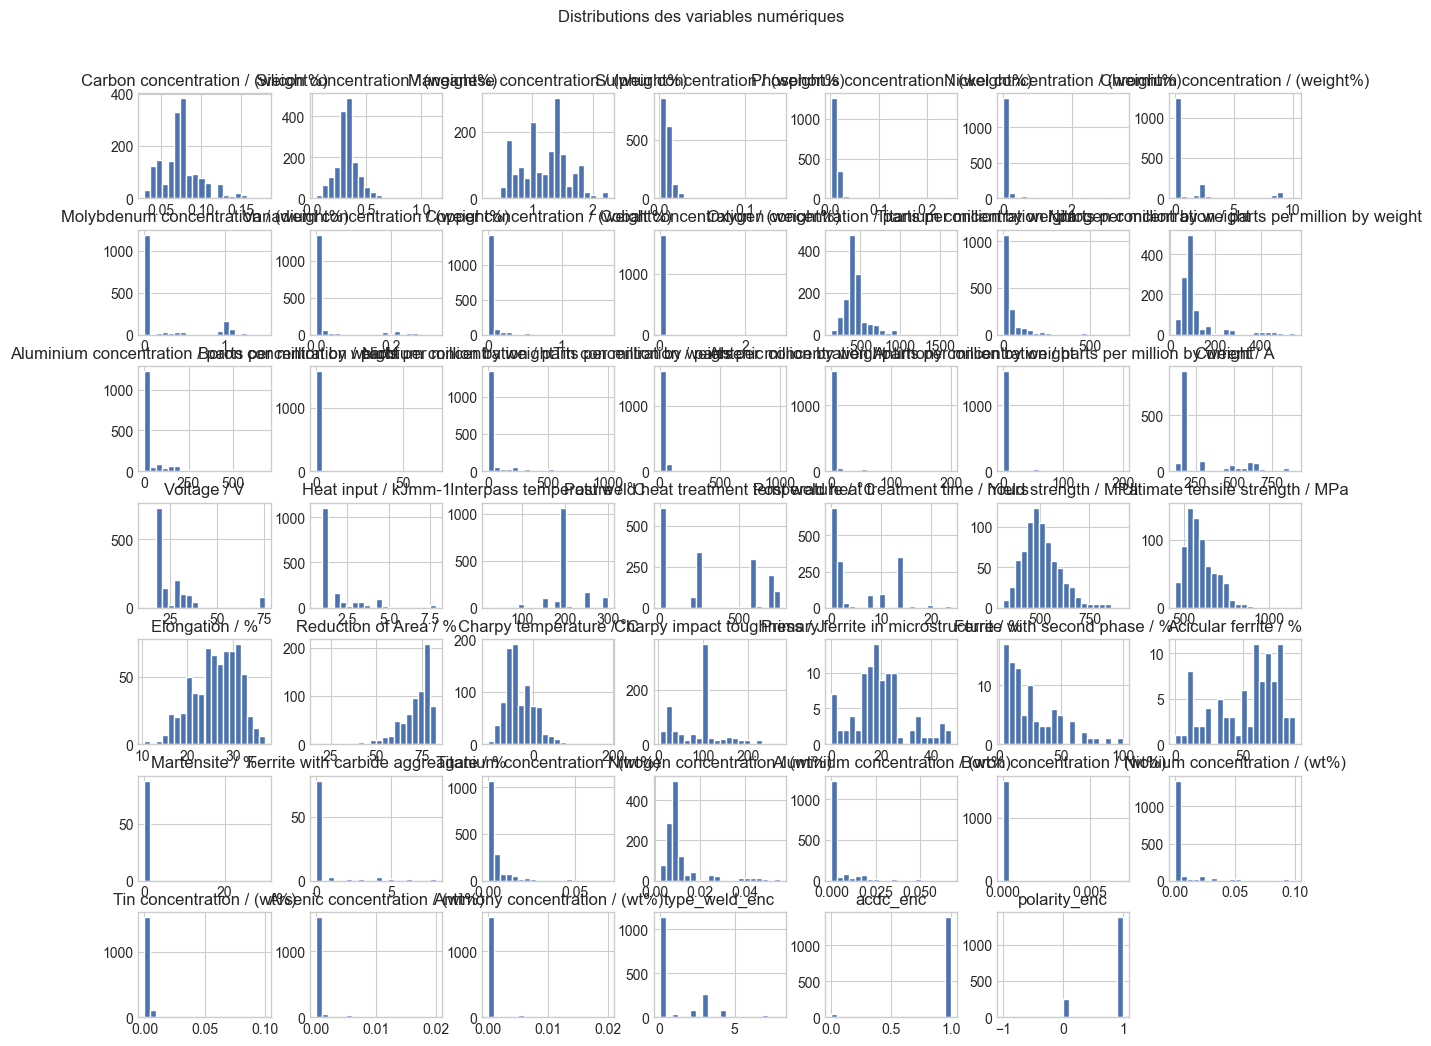

In [12]:
# === 5) Analyse univariée
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"[INFO] Numériques: {len(num_cols)}, Catégorielles: {len(cat_cols)}")

# Histogrammes pour variables numériques
df[num_cols].hist(bins=20, figsize=(15,12))
plt.suptitle("Distributions des variables numériques", y=0.95)
plt.show()

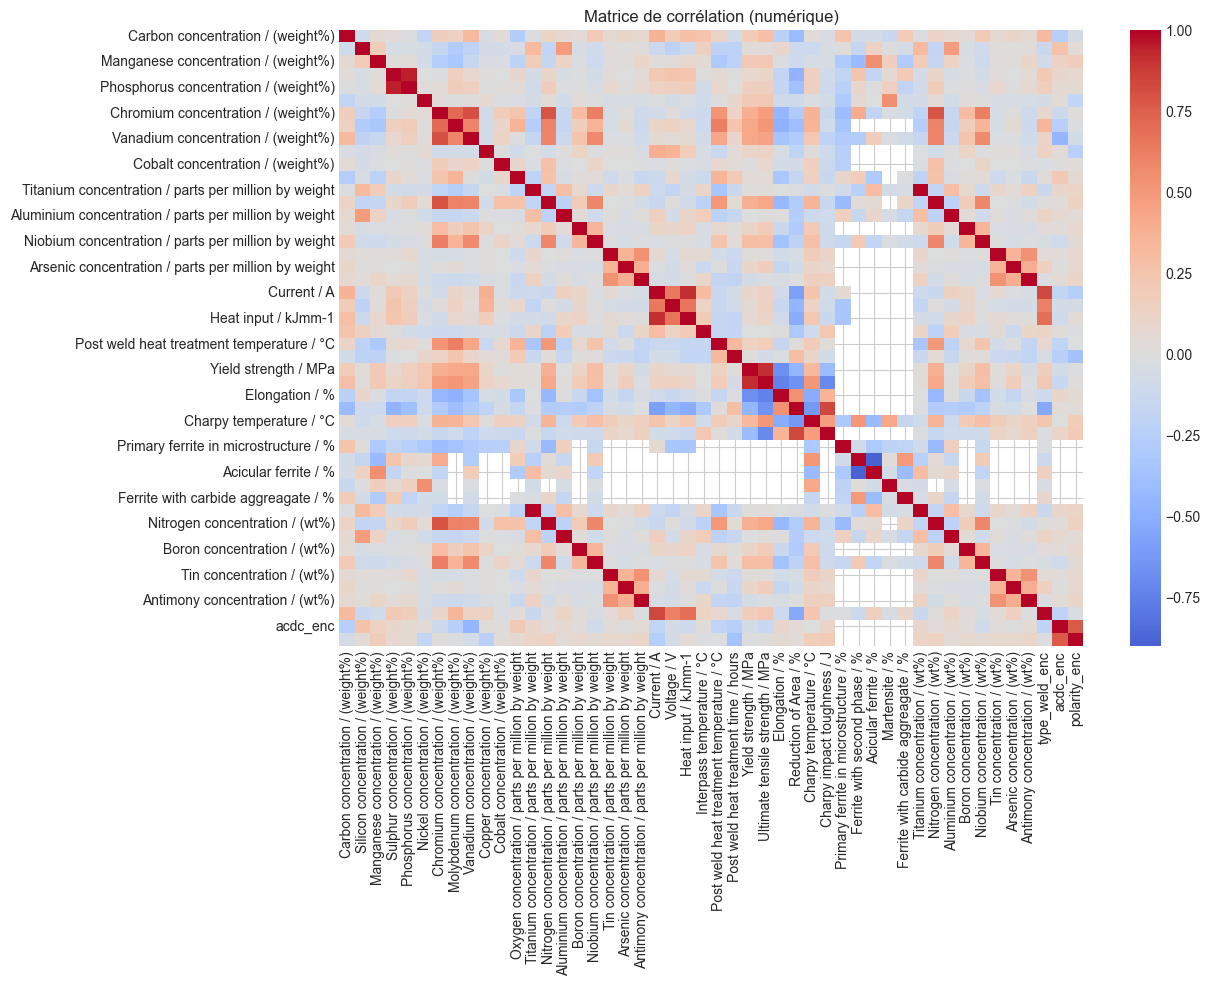

In [13]:
# === 6) Corrélations numériques
plt.figure(figsize=(12,8))
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (numérique)")
plt.show()

# Top corrélations avec la cible
if target_col:
    corr_target = corr[target_col].drop(target_col).sort_values(ascending=False)
    print("\nTop variables corrélées à la cible:")
    display(corr_target.head(10))

In [14]:
# === 7) Paires de variables clés (facultatif)
if target_col:
    top_features = corr_target.head(4).index.tolist()
    sns.pairplot(df, vars=top_features + [target_col], corner=True)
    plt.suptitle("Relations entre variables les plus corrélées à la cible", y=1.02)
    plt.show()

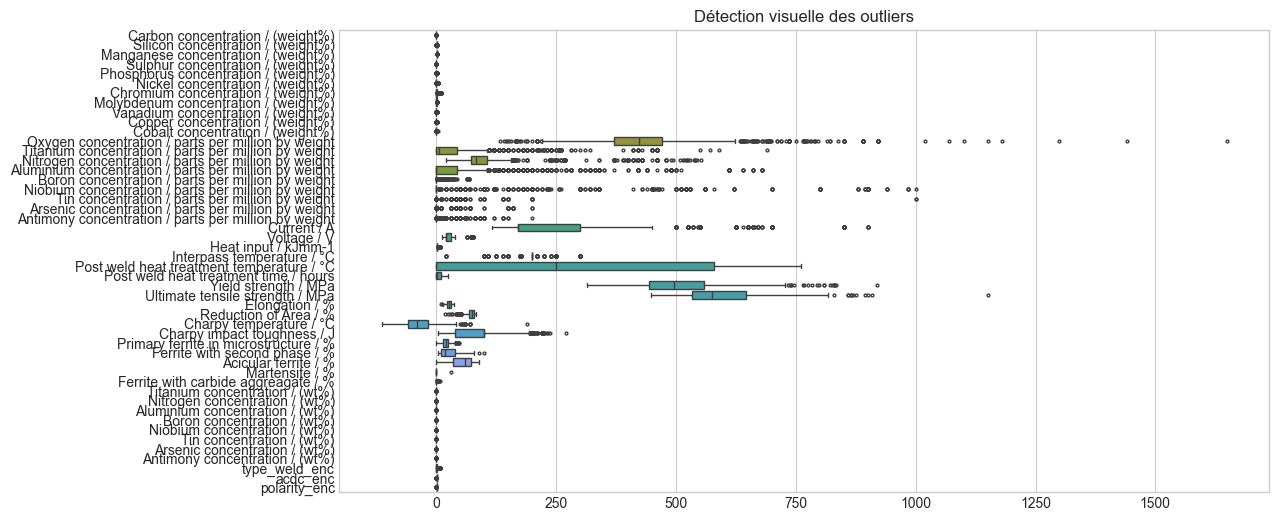

In [15]:
# === 8) Outliers & boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient="h", fliersize=2)
plt.title("Détection visuelle des outliers")
plt.show()

[INFO] Variables numériques pour la PCA : 48
[INFO] Valeurs manquantes totales : 15146
[INFO] Shape pour PCA : (1652, 48)


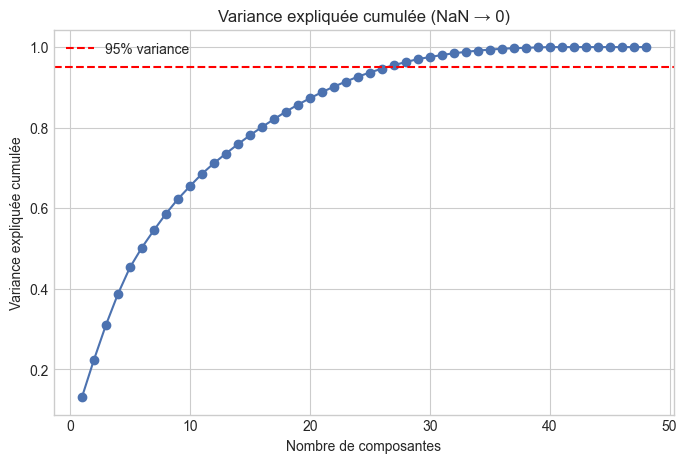

[INFO] Composantes nécessaires pour 95% de variance : 27


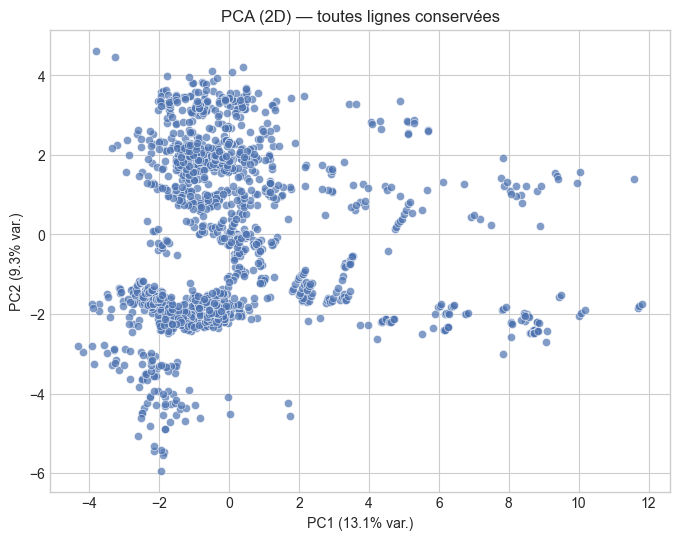

✅ Variance expliquée par PC1+PC2 : 22.38%


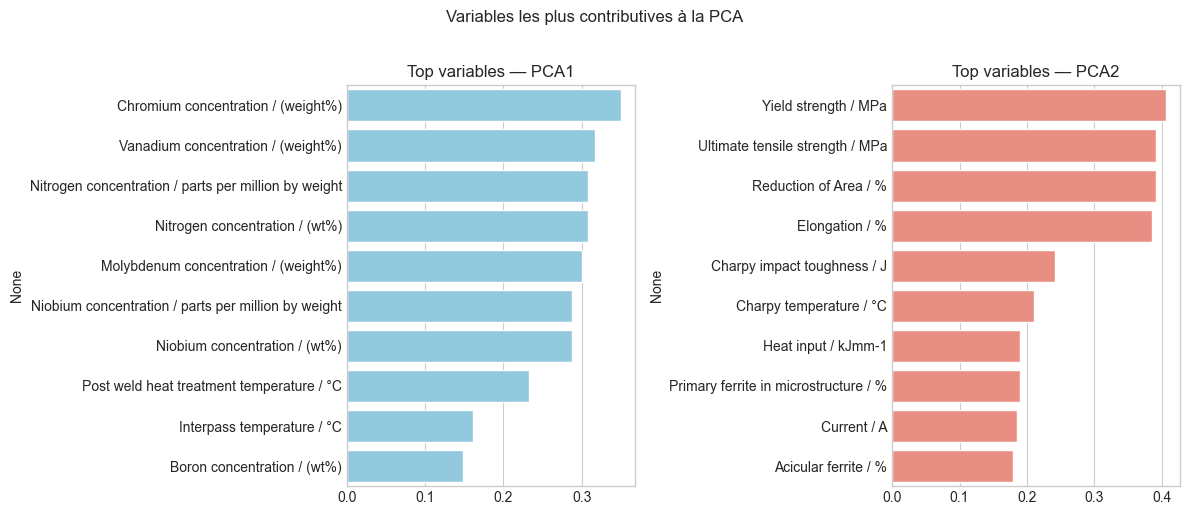

In [17]:
# 🌌 PCA — garder toutes les lignes (NaN → 0)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1) Sélection des colonnes numériques
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"[INFO] Variables numériques pour la PCA : {len(num_cols)}")

# 2) Remplacement des NaN par 0 (aucune ligne supprimée)
df_pca = df[num_cols].copy()
n_missing = df_pca.isna().sum().sum()
print(f"[INFO] Valeurs manquantes totales : {n_missing}")
df_pca = df_pca.fillna(0)

print(f"[INFO] Shape pour PCA : {df_pca.shape}")

# 3) Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# 4) PCA complète (pour variance expliquée)
pca_full = PCA(n_components=None, random_state=0)
pca_full.fit(X_scaled)

var_ratio = pca_full.explained_variance_ratio_
var_cumsum = np.cumsum(var_ratio)
n95 = int(np.searchsorted(var_cumsum, 0.95) + 1)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var_cumsum) + 1), var_cumsum, marker='o')
plt.axhline(0.95, linestyle='--', color='r', label='95% variance')
plt.title("Variance expliquée cumulée (NaN → 0)")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.legend()
plt.grid(True)
plt.show()

print(f"[INFO] Composantes nécessaires pour 95% de variance : {n95}")

# 5) Projection 2D
pca2 = PCA(n_components=2, random_state=0)
X_pca2 = pca2.fit_transform(X_scaled)

df_vis = pd.DataFrame(X_pca2, columns=["PCA1", "PCA2"], index=df.index)

# 6) Variable cible (si dispo)
target_col = None
for candidate in ["Quality", "Target", "label", "Defect", "Result"]:
    if candidate in df.columns:
        target_col = candidate
        break

plt.figure(figsize=(8, 6))
if target_col:
    sns.scatterplot(
        data=df_vis.join(df[target_col]),
        x="PCA1", y="PCA2",
        hue=target_col, palette="viridis",
        alpha=0.75, s=35, edgecolor=None
    )
    plt.title(f"PCA (2D) — colorée par {target_col}")
else:
    sns.scatterplot(x=df_vis["PCA1"], y=df_vis["PCA2"], alpha=0.7, s=35)
    plt.title("PCA (2D) — toutes lignes conservées")

plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0] * 100:.1f}% var.)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1] * 100:.1f}% var.)")
plt.show()

print(f"✅ Variance expliquée par PC1+PC2 : {pca2.explained_variance_ratio_.sum():.2%}")

# 7) Contributions des variables aux deux axes principaux
loadings = pd.DataFrame(
    pca2.components_.T,
    columns=["PCA1", "PCA2"],
    index=df_pca.columns
)

top_pca1 = loadings["PCA1"].abs().sort_values(ascending=False).head(10)
top_pca2 = loadings["PCA2"].abs().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=top_pca1.values, y=top_pca1.index, ax=axes[0], color="skyblue")
axes[0].set_title("Top variables — PCA1")
sns.barplot(x=top_pca2.values, y=top_pca2.index, ax=axes[1], color="salmon")
axes[1].set_title("Top variables — PCA2")
plt.suptitle("Variables les plus contributives à la PCA", y=1.02)
plt.tight_layout()
plt.show()


=== Inerties principales ===


,Composante,Inertie (%),Inertie cumulée (%)
0,PC1,13.100091,13.100091
1,PC2,9.281428,22.381520
2,PC3,8.632718,31.014237
3,PC4,7.694848,38.709085
4,PC5,6.580589,45.289675
5,PC6,4.947705,50.237380
6,PC7,4.307983,54.545363
7,PC8,4.064164,58.609527
8,PC9,3.660949,62.270476
9,PC10,3.185477,65.455952


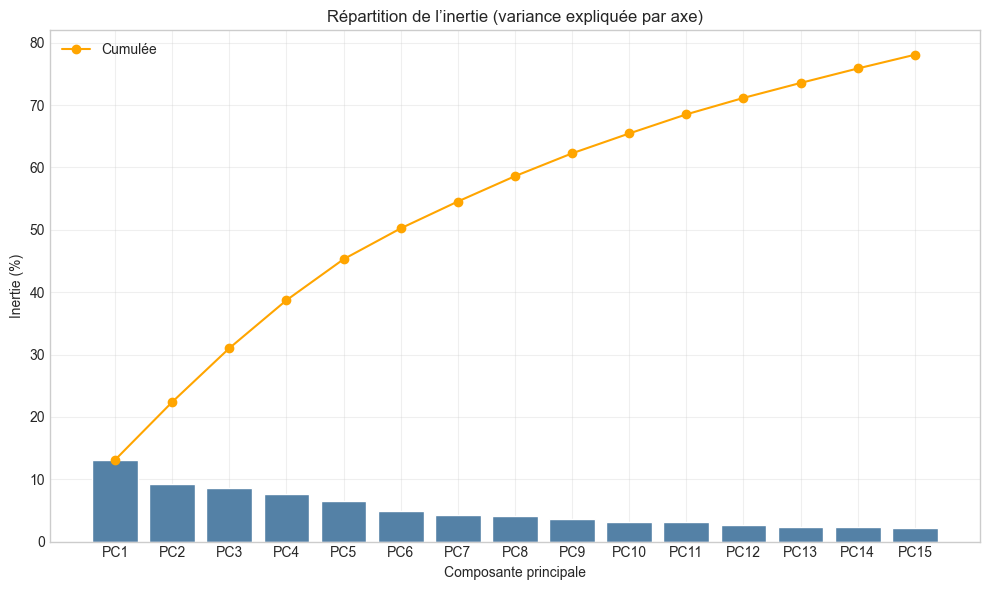

[INFO] Variance totale captée par les 2 premières composantes : 22.38%
[INFO] Variance captée par les 5 premières : 45.29%
[INFO] Nombre de composantes pour 95% de variance : 27


In [19]:
# ⚙️ Inerties et répartition de la variance (PCA)

# On réutilise ton X_scaled (déjà standardisé)
pca = PCA(n_components=None, random_state=0)
X_pca = pca.fit_transform(X_scaled)

# Inerties (variance expliquée par chaque axe)
explained_var = pca.explained_variance_ratio_ * 100  # en %
cum_var = explained_var.cumsum()

# DataFrame récap
inertia_df = pd.DataFrame({
    "Composante": [f"PC{i + 1}" for i in range(len(explained_var))],
    "Inertie (%)": explained_var,
    "Inertie cumulée (%)": cum_var
})

# Affiche les 10 premières composantes
print("=== Inerties principales ===")
display(inertia_df.head(10))

# Graphique : répartition de la variance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=inertia_df["Composante"][:15],
    y=inertia_df["Inertie (%)"][:15],
    color="steelblue"
)
plt.plot(range(len(cum_var[:15])), cum_var[:15], color="orange", marker='o', label="Cumulée")
plt.title("Répartition de l’inertie (variance expliquée par axe)")
plt.xlabel("Composante principale")
plt.ylabel("Inertie (%)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Petite synthèse texte
print(f"[INFO] Variance totale captée par les 2 premières composantes : {cum_var[1]:.2f}%")
print(f"[INFO] Variance captée par les 5 premières : {cum_var[4]:.2f}%")
idx_95 = np.argmax(cum_var >= 95)
print(f"[INFO] Nombre de composantes pour 95% de variance : {idx_95 + 1}")
